<a href="https://colab.research.google.com/github/harshith-118/MachineLearningProjects/blob/main/Classification_Model_on_Letterdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
print("TensorFlow version:", tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.7.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("letterdata.csv")
dataset.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
dataset.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['letter']= label_encoder.fit_transform(dataset['letter'])

In [ ]:
dataset.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,0,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19134,24,3,3,4,2,1,4,11,2,7,11,10,5,1,11,2,5
4981,1,3,5,6,4,4,9,6,3,6,10,5,7,2,8,5,9
16643,10,4,8,4,5,2,3,8,8,2,7,5,11,4,8,3,10
19117,24,5,10,7,7,4,4,10,2,8,11,12,9,3,9,2,6
5306,16,4,7,4,8,5,8,7,6,4,8,7,9,3,8,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,1,5,10,5,8,4,6,8,9,7,7,6,7,2,8,9,10
5486,1,5,9,7,7,5,9,7,4,6,10,5,6,2,8,6,10
8830,3,4,6,5,4,4,9,6,4,6,9,4,6,3,8,3,8
18433,20,2,4,3,3,1,7,8,6,6,7,9,8,3,9,1,8


In [ ]:
test_dataset

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
10,23,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7
19,9,2,2,3,3,1,10,6,3,6,12,4,9,0,7,1,7
28,7,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
40,23,5,11,8,8,4,8,8,1,8,10,5,7,3,8,4,8
43,6,4,5,5,8,3,7,6,8,8,6,6,10,1,8,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19970,5,7,10,9,8,7,9,7,2,6,12,4,6,5,9,4,9
19980,17,2,3,3,2,2,7,7,5,5,7,5,6,2,7,4,8
19982,24,3,9,5,6,3,7,9,1,6,6,11,8,2,11,2,7
19985,12,5,6,8,4,5,9,6,2,4,9,5,7,8,6,2,8


In [ ]:
train_dataset['letter'].unique()

array([24,  1, 10, 16, 13, 22, 17, 25,  3,  5,  2, 19,  4, 14, 15,  9, 23,
        6, 12,  0,  8, 18, 11,  7, 20, 21])

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('letter')
test_labels = test_features.pop('letter')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
test_result={}

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_fn= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      layers.Dense(256, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(26)
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4min 58s, sys: 21.8 s, total: 5min 20s
Wall time: 3min 26s


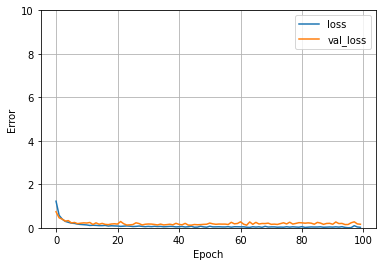

In [ ]:
plot_loss(history)

In [ ]:
test_result['Multiple Input Hidden Layer Regression Model'] = dnn_model.evaluate(test_features,test_labels, verbose=0)

In [ ]:
print(dnn_model.evaluate(test_features, test_labels, verbose=0))

0.1879364550113678


In [ ]:
pd.DataFrame(test_result, index=['Sparse Categorical Crossentropy [Letter]']).T

,Mean absolute error [Strength]
Multiple Input Hidden Layer Regression Model,0.187936
